In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
import eli5
from IPython.display import display
from eli5.sklearn import PermutationImportance

data = pd.read_csv('FIFA 2018 Statistics.csv') # učitavanje podataka

# pripemanje skupa značajki
feature_names = data.select_dtypes(include=np.int64).columns.tolist()
X = data[feature_names]

# pripremanje skupa  oznaka
Y = data['Man of the Match']
labelencoder = LabelEncoder()
Y= labelencoder.fit_transform(Y)

# podjela skupa podataka na skup za treniranje i testiranje  
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state=1) 

# stvaranje modela slučajne šume
RandomForest = RandomForestClassifier(random_state=0)
trained_model = RandomForest.fit(train_X, train_Y) # treniranje modela


# ispis tablice permutacijske važnosti skupa za testiranje
perm = PermutationImportance(trained_model, random_state=1).fit(test_X, test_Y) 
display(eli5.show_weights(perm, feature_names = test_X.columns.tolist()))

# ispis tablice permutacijske važnosti skupa za treniranje
perm1 = PermutationImportance(trained_model, random_state=1).fit(train_X,train_Y)
display(eli5.show_weights(perm1, feature_names = train_X.columns.tolist()))

print()

Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


Weight,Feature
0.1375 ± 0.0243,Goal Scored
0.0187 ± 0.0156,Attempts
0.0104 ± 0.0132,Free Kicks
0.0104 ± 0.0000,Blocked
0.0083 ± 0.0083,Distance Covered (Kms)
0.0062 ± 0.0102,Pass Accuracy %
0.0062 ± 0.0102,On-Target
0.0042 ± 0.0102,Ball Possession %
0.0021 ± 0.0083,Fouls Committed
0.0021 ± 0.0083,Passes


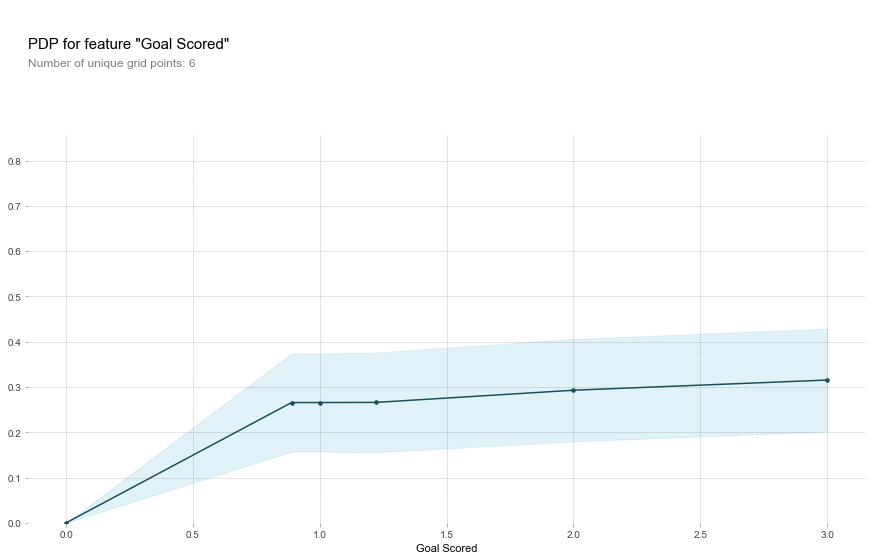

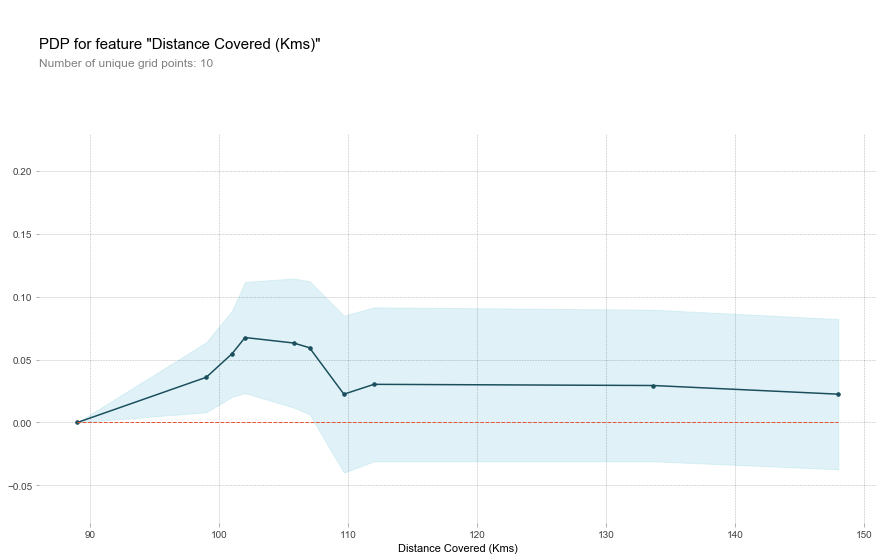

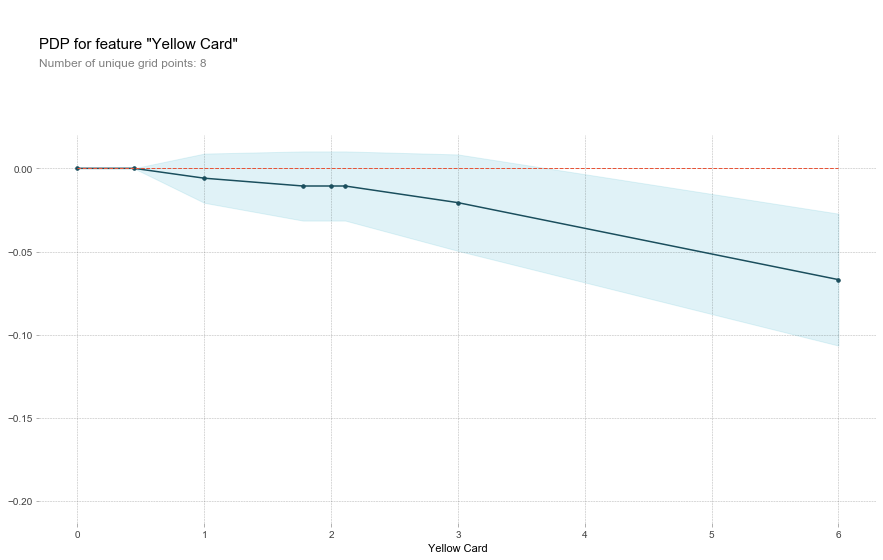

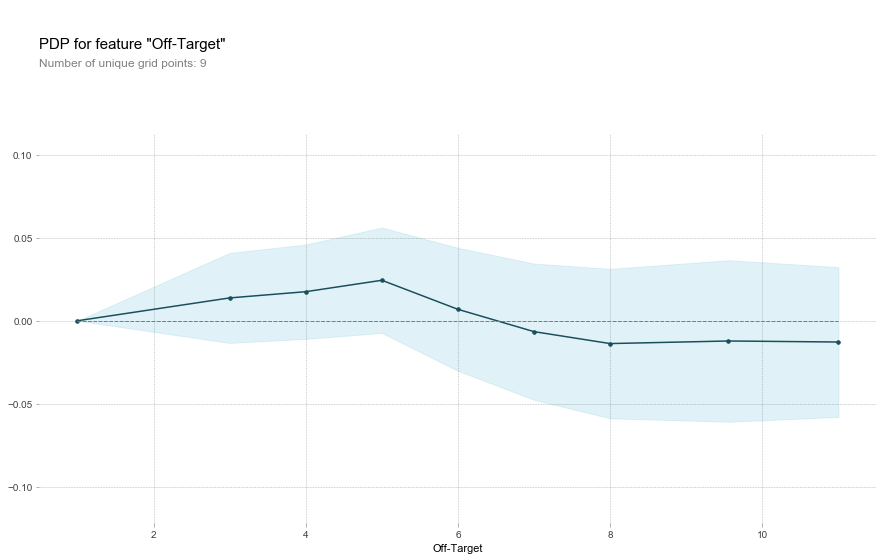

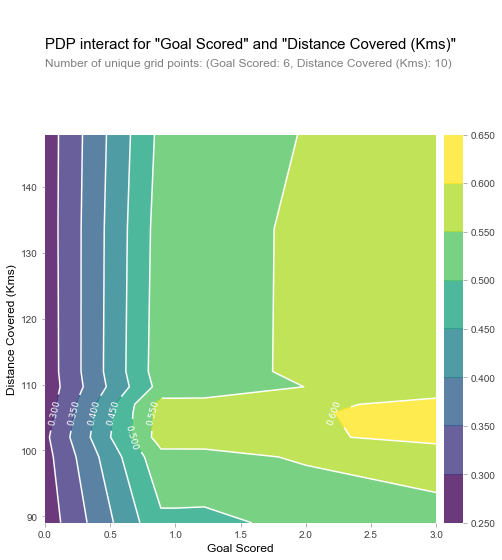

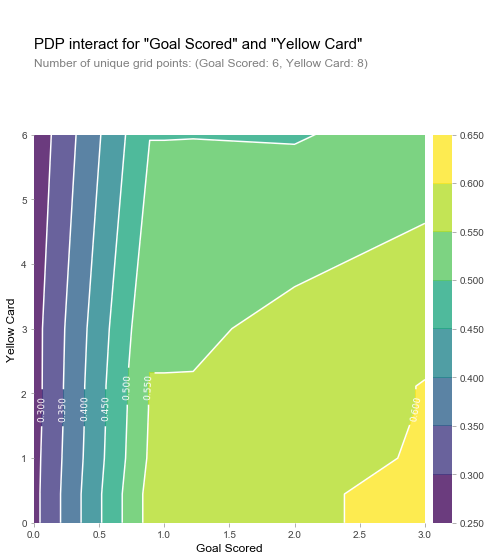

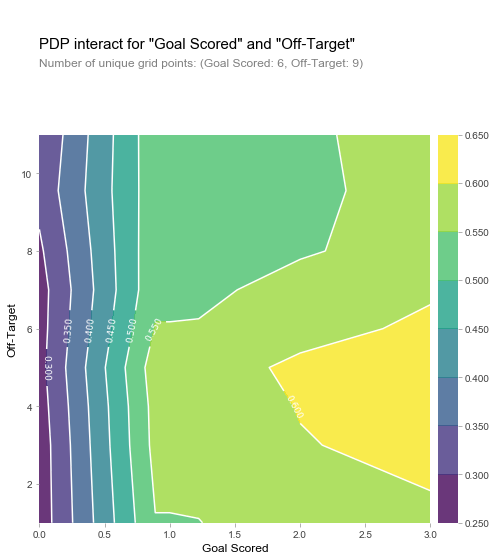

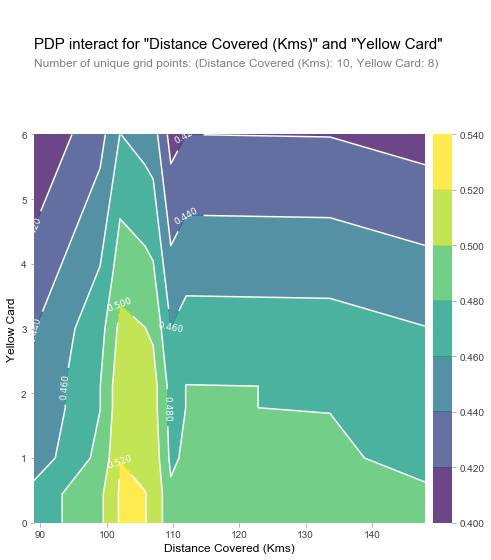

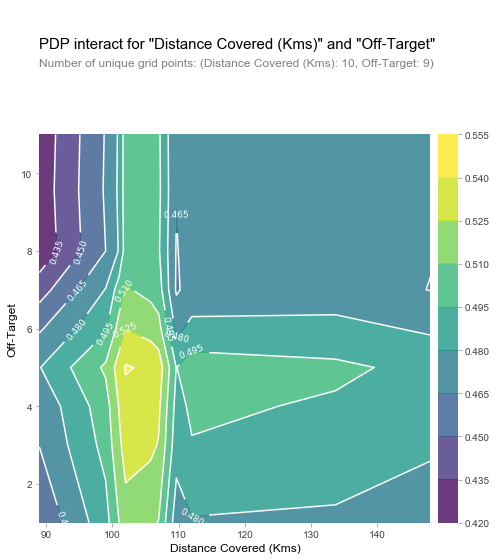

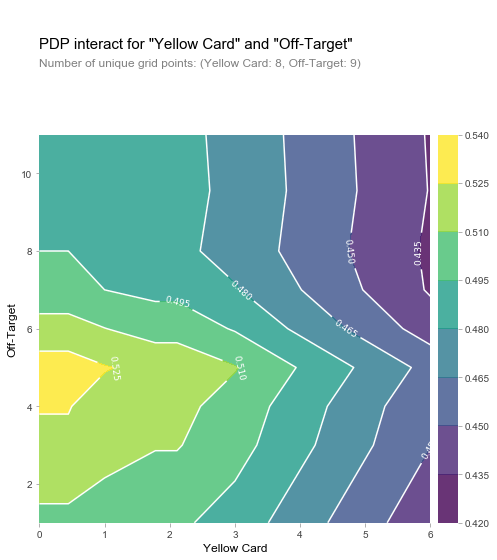

In [2]:
# odabir željenih značajki
feature_names1 = [ 'Goal Scored', 'Distance Covered (Kms)', 'Yellow Card', 'Off-Target']

# generiranje dijagrama dijelomične ovisnosti za pojedinu značajku
for feature in feature_names1:
    
    pdp_dist = pdp.pdp_isolate(model=trained_model, dataset=test_X, model_features=feature_names, feature=feature)
    pdp.pdp_plot(pdp_dist, feature)
    plt.show()

# generiranje dijagrama dijelomične ovisnosti za interakciju dviju značajki
for i in range(len(feature_names1)):
    for j in range(len(feature_names1)):
        if j>i:
            
            features_to_plot = [feature_names1[i], feature_names1[j]]
            interation = pdp.pdp_interact(model=trained_model, dataset=test_X, model_features=feature_names, features=features_to_plot) #A
            pdp.pdp_interact_plot(pdp_interact_out=interation, feature_names =features_to_plot)
            plt.show()